In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder


In [5]:
df=pd.read_csv(r"C:\Users\dobil\OneDrive\Documents\Tekworks\Social_Network_Ads.csv")
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
x=df[["Age","EstimatedSalary"]]

y=df["Purchased"]


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
# s=StandardScaler()
# x_train_scaled=s.fit_transform(x_train)
# x_test_scaled=s.transform(x_test)
rf=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=42,max_depth=4)
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=10,
                       random_state=42)

In [9]:
y_pred=rf.predict(x_test)
print("Accuracy:\n",accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Accuracy:
 0.9125
Confusion Matrix:
 [[47  5]
 [ 2 26]]


<Axes: >

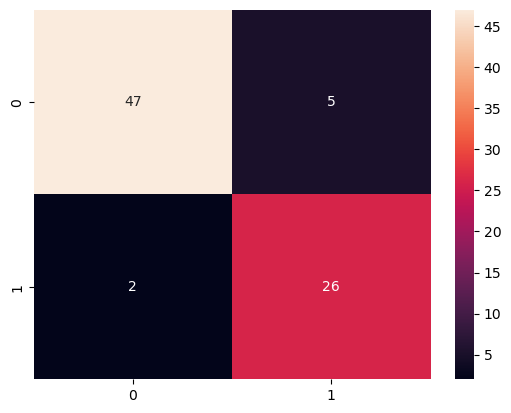

In [10]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

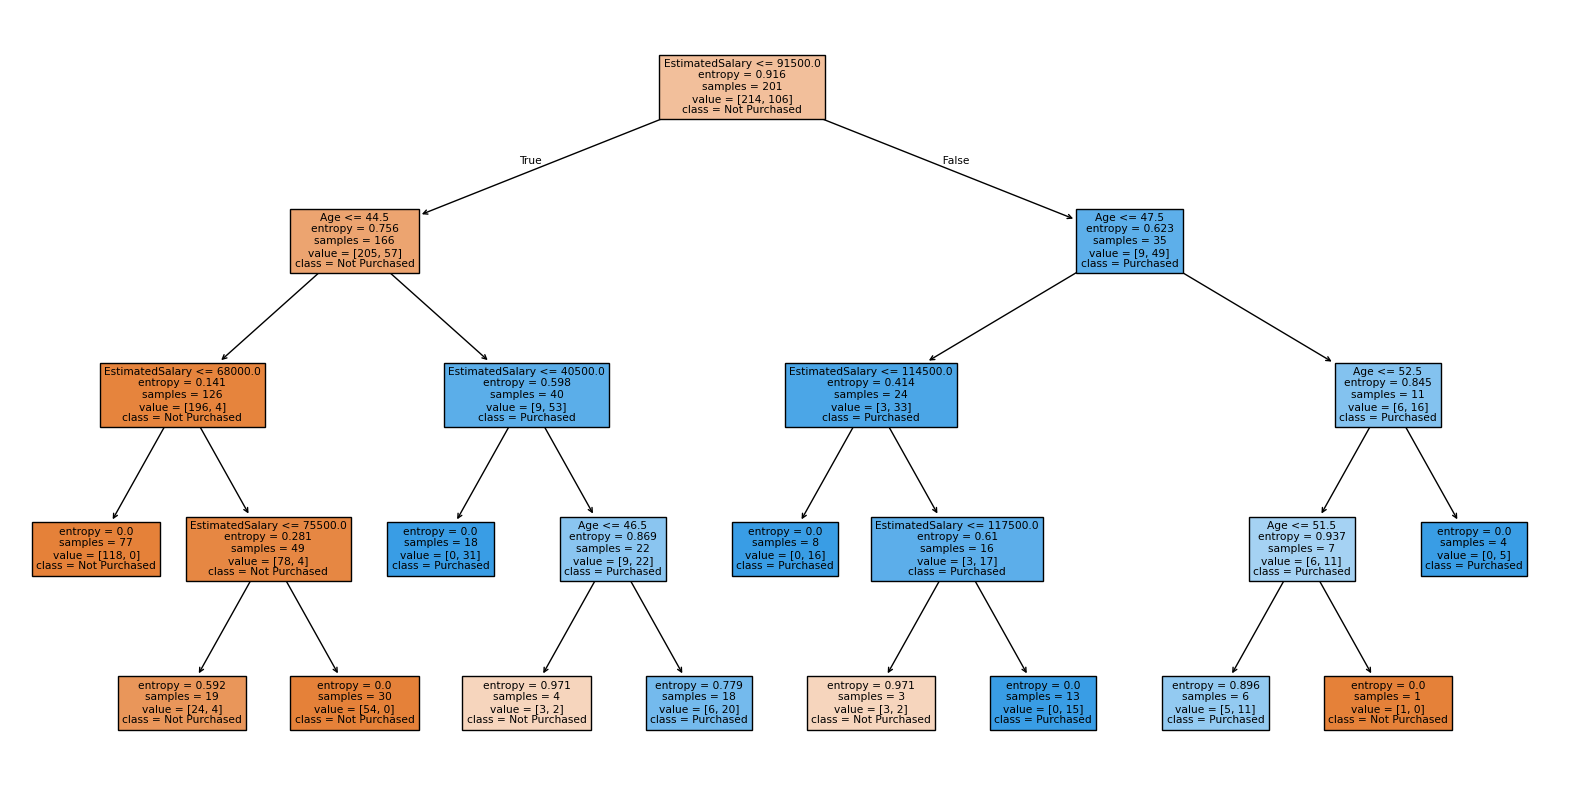

In [11]:
single_tree=rf.estimators_[0]
plt.figure(figsize=(20,10))
plot_tree(single_tree,filled=True,feature_names=x.columns,class_names=['Not Purchased','Purchased'])
plt.show()

In [14]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
best_params={
    'n_estimators':[100,200,300],
    'max_depth':[None,10,20,30],
    'min_samples_split':[2,3,5,10],
    'min_samples_leaf':[1,2,4],
    'max_features':['auto','sqrt','log2']
}
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=model,
param_grid=best_params,scoring='accuracy',cv=5,n_jobs=-1,verbose=0)
grid_search.fit(x_train,y_train)


c:\Users\dobil\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
720 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
408 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\dobil\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dobil\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\Users\dobil\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 3, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [15]:
best_parameters=grid_search.best_params_
print("Best parameters:",best_parameters)
best_score=grid_search.best_score_
print("Best Score:",best_score)

Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best Score: 0.909375


In [13]:
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.9125


In [16]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier(random_state=42)
best_params={
    'n_estimators':[100,200,300],
    'max_depth':[None,10,20,30],
    'min_samples_split':[2,3,5,10],
    'min_samples_leaf':[1,2,4],
    'max_features':['auto','sqrt','log2']

}
from sklearn.model_selection import RandomizedSearchCV
R=RandomizedSearchCV(estimator=model2,param_distributions=best_params,n_iter=10,cv=5,n_jobs=-1,scoring='accuracy',verbose=2)
grid_search.fit(x_train,y_train)


c:\Users\dobil\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
720 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
384 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\dobil\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dobil\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\Users\dobil\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 3, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [17]:
print("Accuracy2:",accuracy_score(y_test,y_pred))

Accuracy2: 0.9125
